In [1]:
pip install selenium

     |████████████████████████████████| 958 kB 4.1 MB/s 
     |████████████████████████████████| 138 kB 66.3 MB/s 
     |████████████████████████████████| 356 kB 55.4 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
     |████████████████████████████████| 3.6 MB 70.6 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
from sklearn.model_selection import KFold

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz, plot_tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

# **DATA ANALYSIS**

In [3]:
credit_card= pd.read_csv('/content/drive/MyDrive/AER_credit_card_data.csv')
credit_card.info()
credit_card.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3


In [4]:
credit_card.columns


Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [5]:
credit_card.isnull().sum()


card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [6]:
credit_card.describe().T


,count,mean,std,min,25%,50%,75%,max
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


In [7]:
credit_card['card']=LabelEncoder().fit_transform(credit_card['card'])
credit_card['selfemp']=LabelEncoder().fit_transform(credit_card['selfemp'])
credit_card['owner']=LabelEncoder().fit_transform(credit_card['owner'])

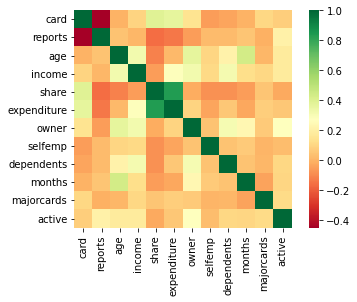

In [8]:
sns.heatmap(credit_card.corr(), square=True, cmap='RdYlGn')


In [9]:
X= credit_card.drop('card', axis=1)
y= credit_card['card']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(len(X_train))
print(len(X_test))

1055
264


In [11]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train[['age', 'income', 'share', 'expenditure', 'months', 'active']])
X_test = sc.transform(X_test[['age', 'income', 'share', 'expenditure', 'months', 'active']])

# **Decision tree**

In [12]:
dt = DecisionTreeClassifier(max_depth=2,
                            
                            random_state=1111)


dt.get_params()


dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1111)

In [13]:
preds = dt.predict(X_test)
print("*"*54)
acc = accuracy_score(preds, y_test)
print("Test set accuracy: {:.2f}".format(acc))

print("*"*54)
print(confusion_matrix(y_test,preds), "\n")

print("*"*54)
print(classification_report(y_test,preds))
print("*"*54)


******************************************************
Test set accuracy: 0.98
******************************************************
[[ 62   0]
 [  6 196]] 

******************************************************
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        62
           1       1.00      0.97      0.98       202

    accuracy                           0.98       264
   macro avg       0.96      0.99      0.97       264
weighted avg       0.98      0.98      0.98       264

******************************************************


In [14]:
pip install -U graphviz


     |████████████████████████████████| 46 kB 1.7 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [15]:

from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz

In [16]:
# -------------------------
features = list(credit_card.columns[1:])
features


['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'owner',
 'selfemp',
 'dependents',
 'months',
 'majorcards',
 'active']

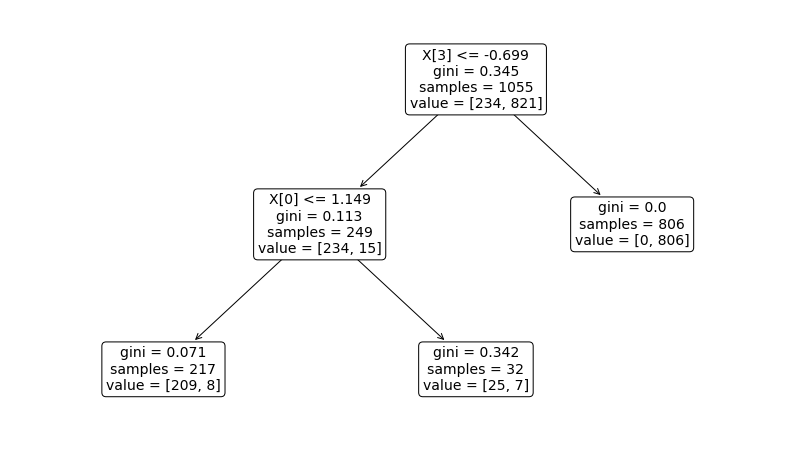

In [17]:
plt.figure(figsize=(14, 8))

text_split_info = plot_tree(dt, rounded=True, fontsize=14)

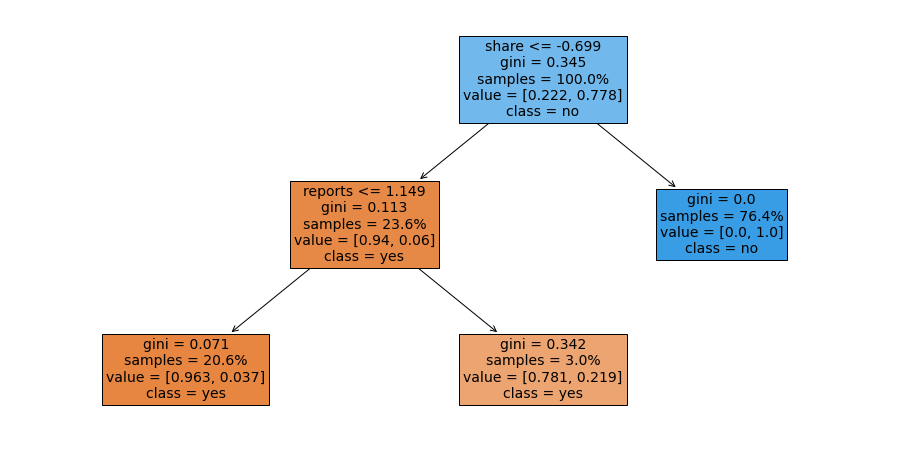

In [18]:
plt.figure(figsize=(16, 8))
_ = plot_tree(dt, filled=True,
                   feature_names = features,
                   fontsize=14, 
                   proportion=True,
                   class_names=['yes','no'])

# **Logistic Regression**

In [19]:
Logistic_Model = LogisticRegression().fit(X_train, y_train)
#prediction using Logistic model
y_pre_Logistic= Logistic_Model.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        62
           1       0.99      0.92      0.95       202

    accuracy                           0.93       264
   macro avg       0.89      0.94      0.91       264
weighted avg       0.94      0.93      0.93       264



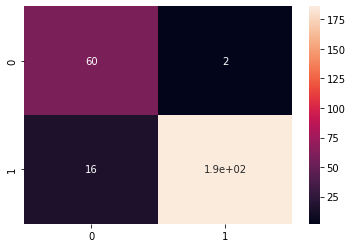

In [20]:
conf_matrix= confusion_matrix(y_test, y_pre_Logistic)
sns.heatmap(conf_matrix, annot=True)
print(classification_report(y_test, y_pre_Logistic))


In [22]:
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

# accuracy
accuracy = (TN + TP)/(TN + TP + FN +FP )
print("accuracy: ", accuracy)


# sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

#specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.9318181818181818
sensitivity:  0.9207920792079208
specificity:  0.967741935483871


# **KNN CLASSIFIER**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 42  20]
 [ 11 191]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        62
           1       0.91      0.95      0.92       202

    accuracy                           0.88       264
   macro avg       0.85      0.81      0.83       264
weighted avg       0.88      0.88      0.88       264



In [24]:
# Score the knn classifier 
acc_knn =knn.score(X_test, y_test)

# Print the accuracy
print("The model Accuracy is".center(70))
print("="*70)
print("Test set accuracy: {:.2f}".format(acc_knn))
print("-"*70)

                        The model Accuracy is                         
Test set accuracy: 0.88
----------------------------------------------------------------------


# **Ensemble Algorithme**

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Instantiate logreg

logreg = LogisticRegression(random_state=10)

# Instantiate knn
knn = KNN(n_neighbors=5)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf= 0.03, 
                            random_state=10)

# Define the list classifiers
classifiers = [('Logistic Regression', logreg), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:20}: {:.3f}'.format(clf_name,  accuracy))

Logistic Regression : 0.932
K Nearest Neighbours: 0.864
Classification Tree : 0.977


In [26]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.955


# **Bagging classifier using decison tree**








In [27]:
dt = DecisionTreeClassifier(min_samples_leaf=0.1,
                            random_state=1)

# Instantiate bagging classifier
# ------------------------------
bc = BaggingClassifier(base_estimator= dt, 
                       n_estimators= 100 ,
                       oob_score=True,
                       random_state=1)

# Fit bc to the training set
# -------------------------
bc.fit(X_train, y_train)

# Predict test set labels
#-------------------------
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = bc.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.977
**************************************************
The OOB accuracy: 0.985


# **Bagging classifier using KNN**


In [28]:
knn = KNN(n_neighbors=5)
bc_knn = BaggingClassifier(base_estimator= knn, 
                       n_estimators= 100 ,
                       oob_score=True,
                       random_state=1)

# Fit bc to the training set
# -------------------------
bc_knn.fit(X_train, y_train)

# Predict test set labels
#-------------------------
y_pred = bc_knn.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = bc_knn.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.871
**************************************************
The OOB accuracy: 0.853


# **Bagging classifier using logistic regression**


In [29]:
lg=LogisticRegression(random_state=10)
bc_lg = BaggingClassifier(base_estimator= lg, 
                       n_estimators= 100 ,
                       oob_score=True,
                       random_state=1)

# Fit bc to the training set
# -------------------------
bc_lg.fit(X_train, y_train)

# Predict test set labels
#-------------------------
y_pred = bc_lg.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = bc_lg.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.932
**************************************************
The OOB accuracy: 0.936


# **Adaboost**


In [40]:
# -------------------------------
from sklearn.model_selection import GridSearchCV

ada_tree = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(
                        max_depth=5,                                    
                        random_state=1),             
                        random_state=1)

ada_param_grid = {'n_estimators': [10,30,50, 100,200],
                 'learning_rate': [0.01, 0.001,1]}

ada_gs = GridSearchCV(estimator=ada_tree ,
                       param_grid=ada_param_grid,
                       #cv = 10,
                       verbose = 1)

# Fitting the grid
# ---------------
ada_gs_model = ada_gs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [41]:
print("*"*40)

for hyper_name, val in ada_gs_model.best_params_.items():
    print("{:15s} : {}".format(hyper_name, val))
print("*"*40)
print("The best score: {:.4f}".format(ada_gs_model.best_score_))
print("*"*40)

****************************************
learning_rate   : 1
n_estimators    : 50
****************************************
The best score: 0.9839
****************************************


In [42]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=10)
#dtree.fit(X_train, Y_train)

# Tuning the hyperparams
ada_tuned = AdaBoostClassifier(
           base_estimator=dtree,                          
           n_estimators=50,                                                                              
           learning_rate=1,                                   
           random_state=1)

ada_tuned.fit(X_train, y_train)

# The accuracy of tuned model
# ---------------------------
print("*"*40)
print('The Tuned model accuracy is: {:.4}'.format(
    (ada_tuned.score(X_test,y_test)))
     )
print("*"*40)

# The Tuned model AUC score
# -------------------------
y_pred_ada_tuned = ada_tuned.predict_proba(X_test)
fpr_ab_tuned, tpr_ab_tuned, thresholds = roc_curve(y_test, y_pred_ada_tuned[:,1])
auc_adaboost_tune = auc(fpr_ab_tuned, tpr_ab_tuned)

print ('The Tuned Adaboost AUC Score is: {:.4f}'.format(auc_adaboost_tune))
print("*"*40)

****************************************
The Tuned model accuracy is: 0.9697
****************************************
The Tuned Adaboost AUC Score is: 0.9916
****************************************
